In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
from matplotlib import rc
import seaborn as sns
rc('font',**{'family':'serif','serif':['Arial']})
plt.rcParams['pdf.fonttype'] = 42

In [2]:
# dataframe with percent change values at each timepoint
pc_df=pd.read_csv('2020-02-21_CPDseq/pc_df_TTgreaterthan5',index_col=0)
#pc_df=pc_df[pc_df>-0.2]
# RNA-Seq RPKMs
TS_rpkm=pd.read_csv('2018-05-22_RNAseq/TS_rpkm.csv',index_col=0)
NTS_rpkm=pd.read_csv('2018-05-22_RNAseq/NTS_rpkm.csv',index_col=0)
# combine all data into one dataframe
joined1=pc_df.join(TS_rpkm)
joined2=joined1.join(NTS_rpkm)


In [3]:
pc_df2=pd.read_csv('2020-07-13_CPDseq/pc_df_TTgreaterthan5',index_col=0)
#pc_df2=pc_df2[pc_df2>-0.2].dropna()

In [4]:
pc_df3=pd.read_csv('2020-08-19_CPDseq/pc_df_TTgreaterthan5',index_col=0)

In [5]:
joined_pc_df=pc_df.join(pc_df2).dropna()
final_joined=pc_df3.join(joined_pc_df,lsuffix='1',rsuffix='2').dropna()

In [46]:
final_joined.columns

Index(['wt-p_20_TS1', 'wt-p_20_NTS1', 'wt-p_30_TS1', 'wt-p_30_NTS1',
       'wtcm-p_20_TS', 'wtcm-p_20_NTS', 'wtcm-p_30_TS', 'wtcm-p_30_NTS',
       'wtcmbcm_20_TS', 'wtcmbcm_20_NTS', 'wtcmbcm_30_TS', 'wtcmbcm_30_NTS',
       'wtbcm_20_TS', 'wtbcm_20_NTS', 'wtbcm_30_TS', 'wtbcm_30_NTS',
       'lexa3_20_TS', 'lexa3_20_NTS', 'lexa3_30_TS', 'lexa3_30_NTS',
       'wt_10_TS', 'wt_10_NTS', 'wt_20_TS', 'wt_20_NTS', 'wt_30_TS',
       'wt_30_NTS', 'wt_40_TS', 'wt_40_NTS', 'wtrif_10_TS', 'wtrif_10_NTS',
       'wtrif_20_TS', 'wtrif_20_NTS', 'wtrif_30_TS', 'wtrif_30_NTS',
       'wtrif_40_TS', 'wtrif_40_NTS', 'mfd_10_TS', 'mfd_10_NTS', 'mfd_20_TS',
       'mfd_20_NTS', 'mfd_30_TS', 'mfd_30_NTS', 'mfd_40_TS', 'mfd_40_NTS',
       'mfdrif_10_TS', 'mfdrif_10_NTS', 'mfdrif_20_TS', 'mfdrif_20_NTS',
       'mfdrif_30_TS', 'mfdrif_30_NTS', 'mfdrif_40_TS', 'mfdrif_40_NTS',
       'wt-p_20_TS2', 'wt-p_20_NTS2', 'wt-p_30_TS2', 'wt-p_30_NTS2',
       'mfd-p_20_TS', 'mfd-p_20_NTS', 'mfd-p_30_TS', 'mfd-p_3

In [6]:
sub_20=final_joined.loc[:,['wt-p_20_TS1','wt-p_20_NTS1','mfd_20_TS','mfd_20_NTS']]
sub_20.columns=['WT_20_TS','WT_20_NTS','mfd(-)_20_TS','mfd(-)_20_NTS']

In [7]:
mean_df=pd.DataFrame()

In [8]:
mean_df['mean']=TS_rpkm.loc[:,['bm03_TS','bm12_TS','bm10_TS']].mean(axis=1)

In [9]:
high=mean_df[mean_df['mean']>30]

In [10]:
mid=mean_df[(mean_df['mean']<=30) & (mean_df['mean']>5)]

In [11]:
low=mean_df[mean_df['mean']<5]

In [12]:
high=high.iloc[:,:0]
mid=mid.iloc[:,:0]
low=low.iloc[:,:0]

In [13]:
high=high.join(sub_20).dropna()

In [14]:
mid=mid.join(sub_20).dropna()

In [15]:
low=low.join(sub_20).dropna()

In [25]:
tidy_pc=pd.melt(high,var_name='condition',value_name='percent_change')
tidy_pc['background']=tidy_pc['condition'].apply(lambda x:x.split('_')[0])
tidy_pc['timepoint']=tidy_pc['condition'].apply(lambda x:x.split('_')[1])
tidy_pc['strand']=tidy_pc['condition'].apply(lambda x:x.split('_')[2])

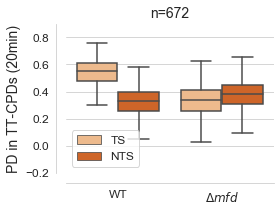

In [27]:
tenmin=tidy_pc[tidy_pc['timepoint']=='20']
#tenmin=tidy_pc[(tidy_pc['background']!='pmfd') & (tidy_pc['timepoint']!='20')]
#tenmin=tenmin[(tenmin['background']=='wt-p') | (tenmin['background']=='lexa3')]

sns.set_style("whitegrid")
plt.figure(figsize=(3.72,2.74))
my_pal = {"TS": "#D6F1FD", "NTS": "#00B1FF"}
ax=sns.boxplot(x='background',y='percent_change',hue='strand',data=tenmin,palette='Oranges',showfliers=False)
#sns.stripplot(x='background',y='percent_change',hue='strand',data=tenmin)
plt.xlabel("",fontsize=14)
plt.ylabel("PD in TT-CPDs (20min)",fontsize=14)
plt.legend(fancybox=True,fontsize=12,loc=3)
plt.xticks(range(2),['WT','$\it{Δmfd}$'],fontsize=7)
plt.ylim(-0.2,0.9)
plt.yticks(np.arange(-0.2, 0.9, 0.2))
#plt.title("High Transcription(n=904)")
sns.despine(offset=10 )
plt.title("n=672",fontsize=14)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)
#plt.savefig("high_transcription_wt_mfd_boxplot.png",bbox_inches='tight',transparent=True,dpi=600)

In [19]:
tidy_pc=pd.melt(mid,var_name='condition',value_name='percent_change')
tidy_pc['background']=tidy_pc['condition'].apply(lambda x:x.split('_')[0])
tidy_pc['timepoint']=tidy_pc['condition'].apply(lambda x:x.split('_')[1])
tidy_pc['strand']=tidy_pc['condition'].apply(lambda x:x.split('_')[2])

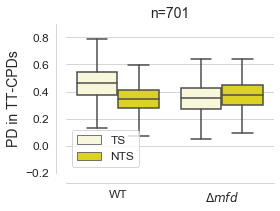

In [21]:
tenmin=tidy_pc[tidy_pc['timepoint']=='20']
#tenmin=tenmin[(tenmin['background']=='wt-p') | (tenmin['background']=='lexa3')]
#sns.set(font_scale = 2)
sns.set_style("whitegrid")
plt.figure(figsize=(3.72,2.74))
my_pal = {"TS": "#FDFAD6", "NTS": "#F9EE05"}
ax=sns.boxplot(x='background',y='percent_change',hue='strand',data=tenmin,palette=my_pal,showfliers=False)
#sns.stripplot(x='background',y='percent_change',hue='strand',data=tenmin)
plt.xlabel("",fontsize=14)
plt.ylabel("PD in TT-CPDs",fontsize=14)
plt.legend(fancybox=True,fontsize=12,loc=3)
plt.xticks(range(2),['WT','$\it{Δmfd}$'],fontsize=7)
plt.ylim(-0.2,0.9)
plt.yticks(np.arange(-0.2, 0.9, 0.2))
#plt.title("Mid Transcription(n=946)")
sns.despine(offset=10 )
plt.title("n=701",fontsize=14)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)
#plt.savefig("mid_transcription_wt_mfd_boxplot.png",bbox_inches='tight',transparent=True,dpi=600)

In [22]:
tidy_pc=pd.melt(low,var_name='condition',value_name='percent_change')
tidy_pc['background']=tidy_pc['condition'].apply(lambda x:x.split('_')[0])
tidy_pc['timepoint']=tidy_pc['condition'].apply(lambda x:x.split('_')[1])
tidy_pc['strand']=tidy_pc['condition'].apply(lambda x:x.split('_')[2])

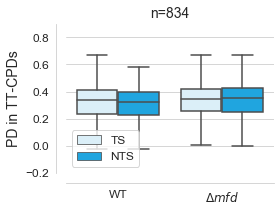

In [24]:
tenmin=tidy_pc[tidy_pc['timepoint']=='20']
#tenmin=tenmin[(tenmin['background']=='wt-p') | (tenmin['background']=='lexa3')]
#sns.set(font_scale = 2)
sns.set_style("whitegrid")
plt.figure(figsize=(3.72,2.74))
my_pal = {"TS": "#D6F1FD", "NTS": "#00B1FF"}
ax=sns.boxplot(x='background',y='percent_change',hue='strand',data=tenmin,palette=my_pal,showfliers=False)
#sns.stripplot(x='background',y='percent_change',hue='strand',data=tenmin)
plt.xlabel("")
plt.ylabel("PD in TT-CPDs",fontsize=14)
plt.legend(fancybox=True,fontsize=12,loc=3)
plt.xticks(range(2),['WT','$\it{Δmfd}$'],fontsize=7)
plt.ylim(-0.2,0.9)
plt.yticks(np.arange(-0.2, 0.9, 0.2))
#plt.title("Low Transcription(n=1012)")
sns.despine(offset=10)
plt.title("n=834",fontsize=14)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)
#plt.savefig("low_transcription_wt_mfd_boxplot.png",bbox_inches='tight',transparent=True,dpi=600)

In [79]:
high_lis=high.sort_values(by='UV mean', ascending=False)

In [80]:
high_lis.to_csv('high_transcribed.csv')

In [84]:
low_lis=low.sort_values(by='UV mean')

In [86]:
low_lis.to_csv('low_transcribed.csv')

In [7]:
mean_df.to_csv('mean_rpkm.csv')

In [77]:
mid.to_csv('mid_transcribed.csv')